# Constructing PolygonArray and MultiPolygonArray From Exterior Coordinates

In [1]:
import numpy as np

from shapely import Polygon, MultiPolygon
from spatialpandas.geometry import PolygonArray, MultiPolygonArray

In [2]:
polygon_shell = np.array([[89.97223, -58.302593],
                          [89.98285, -58.29493],
                          [89.97226, -58.27778],
                          [89.95511, -58.27485],
                          [89.92737, -58.28543],
                          [89.93793, -58.30258],
                          [89.97223, -58.302593]])

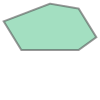

In [3]:
p = Polygon(polygon_shell)
p

In [4]:
exterior_coords = np.asarray(p.exterior.coords)
exterior_coords

array([[ 89.97223 , -58.302593],
       [ 89.98285 , -58.29493 ],
       [ 89.97226 , -58.27778 ],
       [ 89.95511 , -58.27485 ],
       [ 89.92737 , -58.28543 ],
       [ 89.93793 , -58.30258 ],
       [ 89.97223 , -58.302593]])

## PolygonArray

### Construction 

The following snippet shows the constructing of a `PolygonArray` containing three identical polygons

In [5]:
p_arr_shapely = PolygonArray([p, p, p])

In [6]:
p_arr_coords = PolygonArray.from_exterior_coords([exterior_coords, exterior_coords, exterior_coords])

We can see the resulting results are equivalent.

In [7]:
np.all(p_arr_shapely == p_arr_coords)

True

### Timing Comparison

The main motivation for constructing from exterior coordinates is performance.

In [8]:
N = 100000
p_list = [p for i in range(N)]
exterior_coord_list = [exterior_coords for i in range(N)]

In [9]:
%%time
p_arr_shapely = PolygonArray(p_list)

CPU times: total: 828 ms
Wall time: 2.82 s


In [10]:
%%time
p_arr_coords = PolygonArray.from_exterior_coords(exterior_coord_list)

CPU times: total: 31.2 ms
Wall time: 135 ms


In [11]:
np.all(p_arr_shapely == p_arr_coords)

True

## MultiPolygonArray

We can do the same with a MultiPolygonArray.

In [12]:
mp = MultiPolygon(polygons=[p, p])

In [13]:
mp_arr_shapely = MultiPolygonArray([mp])

In [14]:
mp_arr_coords = MultiPolygonArray.from_exterior_coords([[exterior_coords, exterior_coords]])

In [15]:
np.all(mp_arr_shapely == mp_arr_coords)

True

In [16]:
N = 100000
mp_list = [mp for i in range(N)]
exterior_coord_list = [[exterior_coords, exterior_coords] for i in range(N)]

In [17]:
%%time
mp_arr_shapely = MultiPolygonArray(mp_list)

CPU times: total: 1.22 s
Wall time: 7.01 s


In [18]:
%%time
mp_arr_coords = MultiPolygonArray.from_exterior_coords(exterior_coord_list)

CPU times: total: 15.6 ms
Wall time: 296 ms


In [19]:
np.all(mp_arr_shapely == mp_arr_coords)

True